In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'January 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31      102   -154        -13  -6   0    -1    -15      26       1

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

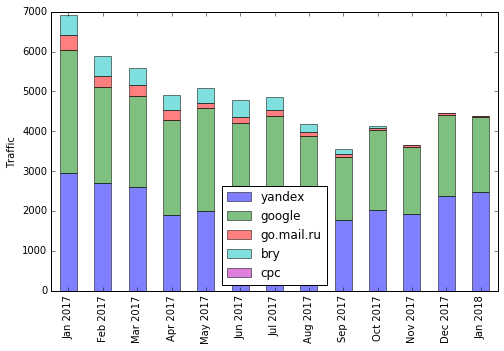

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

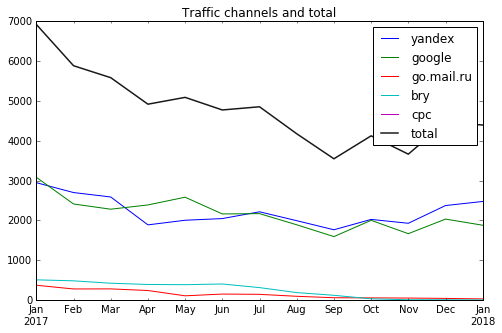

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                             np - /?cnt=catalog&r=2438      1
go.mail.ru 0                                             (not set)     32
google     0                             np - /?cnt=catalog&r=2438    174
           1                                                np - /    123
           2                             np - /?cnt=catalog&r=1428    103
           3                                      np - /?pid=pokaz     92
           4                                  np - /?pid=pricelist     19
           5                                         полотно двери     19
           6                              np - /?cnt=catalog&r=999      7
           7                                    np - /?pid=contact      7
           8                               np - /?pid=menu-katalog      7
           9                             np - /?cnt=catalog&r=1010      5
           10                            np - /?cnt=catalog&r=1792      5
           11                              np - /?cnt=catalog&r=57      5
           12           np - /?pid=derevyannye-mezhkomnatnye-dveri      4
           13                                 полотно двери купить      4
           14                            np - /?cnt=catalog&r=3128      3
           15                             np - /?cnt=catalog&r=448      3
           16                             np - /?cnt=catalog&r=577      3
           17                                       np - /?pid=yes      3
           18                             купить полотно для двери      3
           19                            np - /?cnt=catalog&r=1405      2
           20                            np - /?cnt=catalog&r=1432      2
           21                            np - /?cnt=catalog&r=2233      2
           22                            np - /?cnt=catalog&r=2553      2
           23                            np - /?cnt=catalog&r=3124      2
           24                            np - /?cnt=catalog&r=3134      2
           25                             np - /?cnt=catalog&r=422      2
           26                             np - /?cnt=catalog&r=473      2
           27                             np - /?cnt=catalog&r=477      2
...                                                            ...    ...
yandex     1809                     дверной лидер официальный сайт      1
           1810                                  дверные механизмы      1
           1811                                    дверные полотна      1
           1812                      дверные полотна толщина 30 мм      1
           1813                              дверные проемы купить      1
           1814                              дверные салоны москвы      1
           1815                           дверь гармошка для кухни      1
           1816                                     дверь на кухню      1
           1817                    дверь на кухню из цельной сосны      1
           1818                              дверь на кухню купить      1
           1819           дверь на кухню со стеклом в леруа мерлен      1
           1820                             декор дверного полотна      1
           1821                       закругленные двери для кухни      1
           1822           ирбис дверная фурнитура официальный сайт      1
           1823       ковровская дверная компания официальный сайт      1
           1824          купить арку в дверной проем в зеленограде      1
           1825  купить арку в дверной проем в леруа мерлен фот...      1
           1826  купить арку в дверной проем интернет магазин н...      1
           1827               купить арку в дверной проем недорого      1
           1828  купить дверное полотно без коробки сосна арочн...      1
           1829               купить дверное полотно шириной 50 см      1
           1830                  купить портал для дверного проема      1
           1831                          кухня без двери в кори

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,np - /?cnt=catalog&r=2438,1
go.mail.ru,(not set),32
google,np - /?cnt=catalog&r=2438,174
rambler,верда модель джаз эмаль белая,2
yahoo,np - /,1
yandex,(not set),571


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                          np - /?cnt=catalog&r=2438      1
go.mail.ru 0                                          (not set)     32
google     0                          np - /?cnt=catalog&r=2438    174
           1                                             np - /    123
           2                          np - /?cnt=catalog&r=1428    103
           3                                   np - /?pid=pokaz     92
           4                               np - /?pid=pricelist     19
rambler    0                      верда модель джаз эмаль белая      2
           1                      наличник шпон дуб 65 овальный      1
yahoo      0                                             np - /      1
yandex     0                                          (not set)    571
           1  межкомнатные двери недорого с установкой под ключ      3
           2                                       took-took.ru      2
           3                                   www.took-took.ru      2
           4                                    took took двери      1